In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import keras
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import keras

In [2]:
model = load_model('/kaggle/input/final-model/18.h5')
model

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 256)       0

In [4]:
size = 48
datagen = ImageDataGenerator(
        rescale= 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test = datagen.flow_from_directory('/kaggle/input/fer2013/test',target_size=(size,size),batch_size=4,color_mode = "grayscale",class_mode='categorical',
                                              shuffle=True)

Found 7178 images belonging to 7 classes.


In [5]:
loss, acc = model.evaluate(test, verbose=1)

1795/1795 [==============================] - 41s 20ms/step - loss: 0.6968 - accuracy: 0.7502


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on test data using the trained model
y_pred = np.argmax(model.predict(test), axis=1)

# Get true labels for test data
y_true = test.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion matrix:")
print(cm)

1795/1795 [==============================] - 13s 7ms/step
Confusion matrix:
[[136  21 108 256 166 169 102]
 [ 13   1  12  31  17  24  13]
 [150  14 104 238 197 185 136]
 [235  19 208 465 338 292 217]
 [144  14 150 339 220 208 158]
 [163  19 117 310 238 247 153]
 [106  12 105 223 145 128 112]]


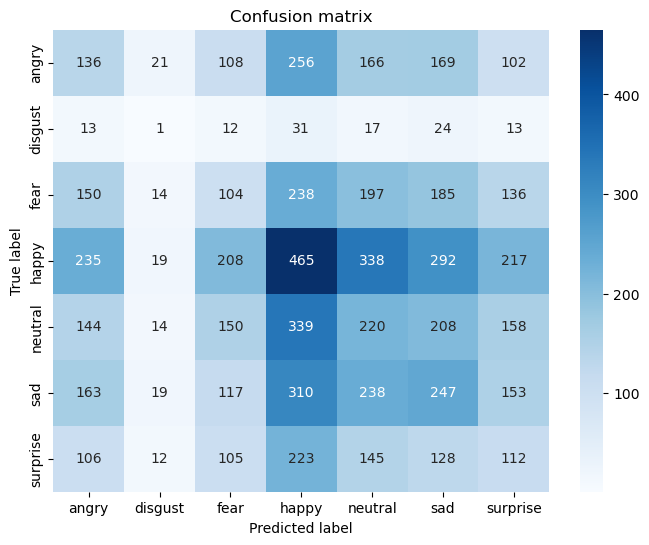

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
from tensorflow.keras.preprocessing import image
from PIL import Image
from matplotlib import pyplot as plt

def predict(img_path):
    emotion = img_path.split('/')[-2]
    print(f'Actual emotion in image {emotion}')

    # Load and preprocess the image
    img = Image.open(img_path).convert('L')
    img = img.resize((48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    # Make a prediction on the image
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions[0])
    classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    plt.figure(figsize=(1, 1))
    plt.imshow(img, cmap='gray')
    plt.show()
    print()
    print(f"Model Prediction is that emotion in image is {classes[predicted_class]}")

Actual emotion in image angry
1/1 [==============================] - 0s 149ms/step


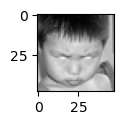


Model Prediction is that emotion in image is angry
Actual emotion in image disgust
1/1 [==============================] - 0s 23ms/step


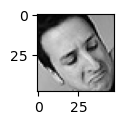


Model Prediction is that emotion in image is disgust
Actual emotion in image fear
1/1 [==============================] - 0s 24ms/step


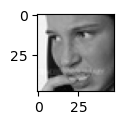


Model Prediction is that emotion in image is fear
Actual emotion in image happy
1/1 [==============================] - 0s 23ms/step


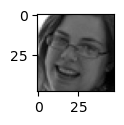


Model Prediction is that emotion in image is happy
Actual emotion in image neutral
1/1 [==============================] - 0s 23ms/step


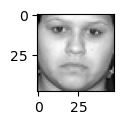


Model Prediction is that emotion in image is neutral
Actual emotion in image sad
1/1 [==============================] - 0s 21ms/step


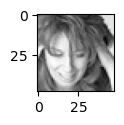


Model Prediction is that emotion in image is sad
Actual emotion in image surprise
1/1 [==============================] - 0s 22ms/step


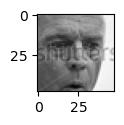


Model Prediction is that emotion in image is surprise


In [9]:
My_images = ['/kaggle/input/fer2013/train/angry/Training_10118481.jpg',
         '/kaggle/input/fer2013/train/disgust/Training_10371709.jpg',
         '/kaggle/input/fer2013/train/fear/Training_10018621.jpg',
         '/kaggle/input/fer2013/train/happy/Training_10019449.jpg',
         '/kaggle/input/fer2013/train/neutral/Training_10031781.jpg',
         '/kaggle/input/fer2013/train/sad/Training_10022789.jpg',
         '/kaggle/input/fer2013/train/surprise/Training_10013223.jpg']

for img_path in My_images:
    predict(img_path)

In [10]:
from tensorflow.keras.models import Model

first_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)

In [11]:
img_path ='/kaggle/input/face-expression-recognition-dataset/images/train/fear/10012.jpg'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Get the output of the first layer for the input image
first_layer_output = first_layer_model.predict(x)

# Print the shape of the first layer's output
print(f"Shape of the first layer's output: {first_layer_output.shape}")

1/1 [==============================] - 0s 49ms/step
Shape of the first layer's output: (1, 48, 48, 256)


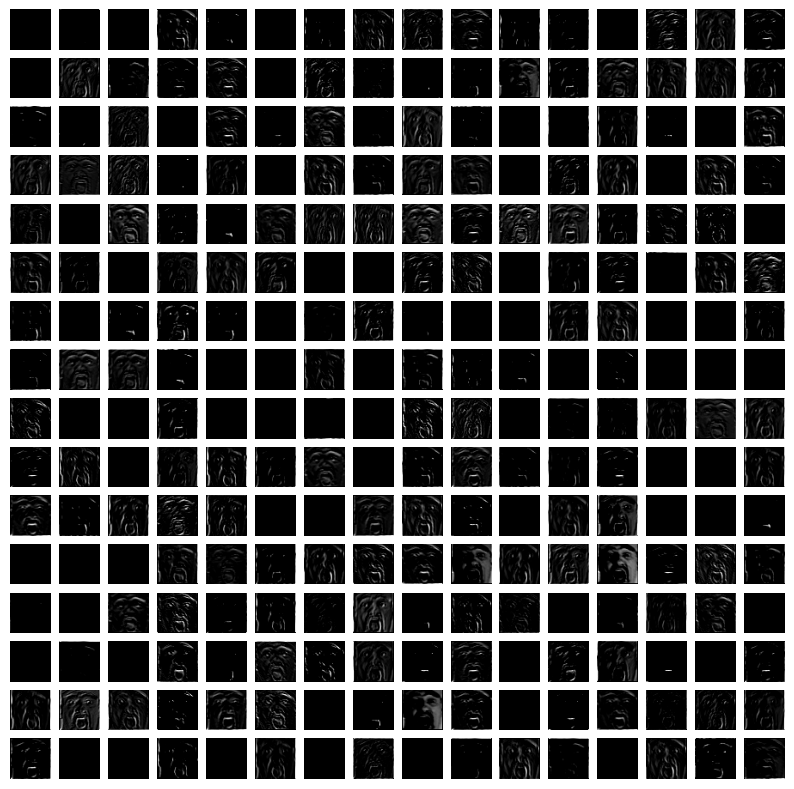

In [12]:
plt.figure(figsize=(10, 10))
for i in range(first_layer_output.shape[-1]):
    plt.subplot(16, 16, i+1)
    plt.imshow(first_layer_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

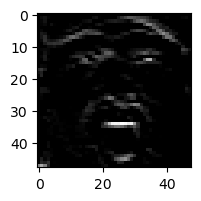

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(first_layer_output[0, :, :, 9], cmap='gray')
